### **Clase 6 - Regresión**

### **`Importar librerias y carga de archivo`**

De forma adicional a pandas, numpy y matplotlib, agregaremos la librería `statsmodels`. Ésta es una librería orientada a la modelación econométrica siguiendo una sintaxis similar a R.

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

import lec5_graphs as gfx
from calidad_datos import calidad_datos

plt.style.use("seaborn-whitegrid") # Graficos estilo seaborn
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # Resolución gráficos

In [48]:
import os
os.listdir()

['Aprendiendow.ipynb',
 'calidad_datos.py',
 'Clase 6 - Regresión.pdf',
 'clase_6_-_regresion.ipynb',
 'earnings.csv',
 'lec5_graphs.py',
 'nations.csv',
 'UNAB - Pronosticos.pdf',
 'UNAB - Regresión Lineal.pdf',
 '__pycache__']

In [49]:
df = pd.read_csv('earnings.csv', index_col=0)
df.shape

(1374, 13)

In [50]:
df.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
3,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
4,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
5,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
9,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
10,9000.0,5,4,2,1,2,15,64,64,26,1,3,0


### **`Codificación de Variables Categóricas`**

#### **1 - Introducción**

`El problema es el siguiente`: Un modelo de regresión lineal (y en su defecto, todos aquellos modelos que vayamos a estudiar en la carrera) es un modelo estadístico, eso quiere decir que la forma en la que toma sus decisiones tienen origen en los fundamentos matemáticos usados para definir el modelo, esto implica que el modelo requiere de representaciones numéricas de la información para poder aprender del fenómeno, en el caso de las variables intrínsecamente numéricas esto no es problema porque ya existen el conjunto de los reales/naturales, sin embargo, ¿qué ocurre con las variables categóricas?, estas variables existen en un dominio discreto que no necesariamente es un subconjunto de los reales, las etiquetas de texto como el continente al que pertenece un país no tiene una traducción natural a un número en algún espacio predefinido, para solucionar esto tendremos que codificar aquellas variables categóricas a una representación numérica. Aunque no lo parezca en desafíos pasados hemos realizado algunas de las codificaciones que ahora veremos más formalmente, por lo que algunas nos debieran parecer familiares.

Para ejemplificar estas transformaciones consideraremos el mismo ejemplo en todos los casos, recordando el dataset nations:

In [13]:
df_ejem = pd.read_csv('nations.csv', encoding= 'iso-8859-1', index_col=0)
df_ejem.shape

(194, 13)

In [14]:
df_ejem.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


Propongamonos el ejercicio de transformar la variable/columna región (continentes) a una representación numérica:

#### **2 - One-Hot Encoding (OHE)**

Sea una variable categórica con `K` clases distintas, OHE indica que debemos generar `K` columnas nuevas donde cada columna nueva representará, para cada fila, la ocurrencia de una determinada clase. En el ejemplo de la columna `region` de nations, la representación OHE puede ser obtenida fácilmente utilizando la función `pd.get_dummies()` de pandas:

In [15]:
pd.get_dummies(df_ejem.region)

,Africa,Americas,Asia,Europe,Oceania
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
190,0,0,0,0,1
191,0,0,0,0,1
192,0,0,0,0,1
193,0,0,0,0,1


De forma un poco más técnica, lo que `OHE` realiza es generar vectores perpendiculares entre sí y con norma unitaria, estos viven en un espacio de dimensionalidad `K`.

#### **3 - Binary Encoding**

Binary Encoding es bastante similar a OHE, con la única diferencia que Binary Encoding codifica una variable categórica con `K` clases en `K-1` columnas, en pandas esto se puede hacer también con la función `pd.get_dummies()` con el argumento `drop_first = True`:

In [16]:
pd.get_dummies(df_ejem.region, drop_first=True)

,Americas,Asia,Europe,Oceania
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
...,...,...,...,...
190,0,0,0,1
191,0,0,0,1
192,0,0,0,1
193,0,0,0,1


Algo que probablemente el lector se esté preguntando es ¿Por qué existe tanto Binary Encoding como OHE si son casi lo mismo y logran representar la misma información?, la razón de esto es que aunque OHE lográ representar las clases de forma bastante explícita, su representación tiene la particularidad de generar columnas colineales entre sí, para hacer más fácil mostrar esto consideremos el caso de codificar una columna de sexo de personas que contiene los valores [Hombre, Mujer], en este caso OHE generaría dos columnas (una para cada clase), quedando las clases representadas por los vectores (1, 0) y (0, 1). Si ponemos atención a los vectores que representan las clases notaremos que es posible predecir el valor que va a tomar el segundo elemento del vector solamente observando el valor que tomó el primer elemento del vector, más específicamente, eso quiere decir que la relación entre las dos columnas creadas es la siguiente:

$$ H = 1 - M$$

¡Esto es una recta! (de ahí el nombre de colinealidad), H es una combinación lineal de M y eso implica que la matriz de codificaciones entregada por OHE no es fullrank, al no ser fullrank la inversa de la matriz de datos no está definida, el problema que esto genera es que el estimador OLS de una regresión lineal (que presentaremos más adelante) no pueda ser calculado de forma analítica ya que se requiere el cálculo de la inversa de la matriz XT X , la
cual al igual que para nuestra matriz de datos X , no tiene inversa definida en el caso no
fullrank de X . Binary Encoding elimina esta colinealidad omitiendo la presencia explícita de
una clase, la cual, como habrá deducido un lector astuto, queda codificada en el origen del sistema de vectores que se genera, mientras OHE nunca ocupa el origen de este sistema (0, 0, 0, ...) en binary encoding la clase omitida ocupa esta posición y eso se puede ver en el output de mostrado anteriormente donde la clase de Africa queda codificada en el vector (0, 0, 0, 0).

`Nota`: Una matriz fullrank es aquella cuyas columnas y/o filas son linealmente independientes.

#### **4 - Label Encoding**

Para una columna categórica con K clases Label Encoding genera una sola columna con las clases codificadas con números naturales, por ejemplo África estaría asignado al número 1, Asia al número 2, Europa al 3. etc. Aunque esto parece ser una mejor forma de codificar las categorías, debemos tener en cuenta que esto también impone un orden en las clases que puede no existir en los datos originales, ¿Por qué un continente debe tener un valor más alto que otro?. Label Encoding debe ser usado para codificar variables categóricas ordinales (como los puestos en los que salen los medallistas olímpicos o los días de la semana/meses del año), no para variables nominales como los continentes, en este último caso preferimos Binary Encoding u OHE.

Por ahora no necesitaremos Label Encoding por lo que lo introduciremos en el siguiente módulo cuando veamos la librería scikit-learn donde se implementan todas estas transformaciones.

Finalmente, mencionar que una vez que hemos codificado una o más variables categóricas, estas representaciones reemplazan a las variables originales en la matriz que debemos ingresar a nuestro modelo. Por otro lado, para adicionar estas representaciones a un DataFrame en pandas basta utilizar la función `pd.concat`:

In [19]:
region_coded = pd.get_dummies(df_ejem.region, drop_first=True)
pd.concat([df_ejem, region_coded], axis=1)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Americas,Asia,Europe,Oceania
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN,0,0,0,0
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN,0,0,0,0
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN,0,0,0,0
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN,0,0,0,0
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN,0,0,0,1
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN,0,0,0,1
192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN,0,0,0,1
193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN,0,0,0,1


### **`Nuestro primer modelo de regresión`**

##### **1 - Introduccion**

In [23]:
df.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
3,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
4,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
5,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
9,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
10,9000.0,5,4,2,1,2,15,64,64,26,1,3,0


Solicitamos las principales estadísticas descriptivas para cada variable con describe(). El método nos entrega información sobre:

-	`count`: La cantidad de observaciones en la muestra.
-	`mean`: La media aritmética de cada variable.
-	`std`: La desviación estándar de cada variable.
-	`min`: El valor mínimo observado de la variable en la muestra.
-	`25%`: El rango intercuartil inferior de la variable en la muestra.
-	`50%`: La mediana de la variable en la muestra.
-	`75%`: El rango intercuartil superior de la variable en la muestra.
-	`max`: El valor máximo observado de la variable en la muestra.

`describe()` es útil, pero para las variables categóricas es mejor ver sus frecuencias. Para ello, utilizaremos `.value_counts()` en cada variable.

In [20]:
df.describe()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000
mean,19981.433770,5.128821,5.050218,1.622999,1.167394,1.941776,13.353712,48.848617,66.596070,41.151383,1.861718,2.780204,0.377001
std,19781.488482,0.360261,3.173719,0.484812,0.641772,0.234252,2.440269,15.542169,3.803324,15.542169,0.814886,0.628077,0.484812
min,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,58.000000,18.000000,1.000000,1.000000,0.000000
25%,6000.000000,5.000000,3.000000,1.000000,1.000000,2.000000,12.000000,39.000000,64.000000,29.000000,1.000000,3.000000,0.000000
50%,16000.000000,5.000000,5.000000,2.000000,1.000000,2.000000,13.000000,52.000000,66.000000,38.000000,2.000000,3.000000,0.000000
75%,28000.000000,5.000000,8.000000,2.000000,1.000000,2.000000,15.000000,61.000000,69.000000,51.000000,3.000000,3.000000,1.000000
max,200000.000000,6.000000,11.000000,2.000000,9.000000,2.000000,18.000000,72.000000,77.000000,87.000000,3.000000,4.000000,1.000000


In [29]:
# separemos todas las variables que son categóricas 
categorical_columns = ['sex', 'race', 'hisp', 'age_category', 'eth', 'male']

# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns: 
    # imprimimos el nombre 
    print("\n",cat)
    # solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
    # solicitamos el porcentaje de la frecuencia relativa 
    # print((df[cat].value_counts()/len(df[cat])))
    print(df[cat].value_counts('%'))
    print("*"*30)



 sex
2    856
1    518
Name: sex, dtype: int64
2    0.622999
1    0.377001
Name: sex, dtype: float64
******************************

 race
1    1216
2     126
3      17
4      10
9       5
Name: race, dtype: int64
1    0.885007
2    0.091703
3    0.012373
4    0.007278
9    0.003639
Name: race, dtype: float64
******************************

 hisp
2    1294
1      80
Name: hisp, dtype: int64
2    0.941776
1    0.058224
Name: hisp, dtype: float64
******************************

 age_category
1    564
2    436
3    374
Name: age_category, dtype: int64
1    0.410480
2    0.317322
3    0.272198
Name: age_category, dtype: float64
******************************

 eth
3    1144
1     126
2      77
4      27
Name: eth, dtype: int64
3    0.832606
1    0.091703
2    0.056041
4    0.019651
Name: eth, dtype: float64
******************************

 male
0    856
1    518
Name: male, dtype: int64
0    0.622999
1    0.377001
Name: male, dtype: float64
******************************


Nuestro objetivo es ver la asociación entre los ingresos generados y la altura de cada individuo.

Primero generaremos un diagrama de dispersión con `sns.jointplot()`. El gráfico entregará información sobre la distribución de cada una de las variables, así como un diagrama de dispersión entre ambas.

<AxesSubplot:xlabel='height', ylabel='earn'>

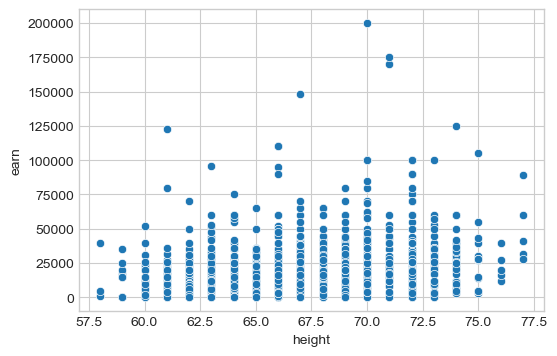

In [38]:
sns.scatterplot(data = df, x = df['height'], y = df['earn'])

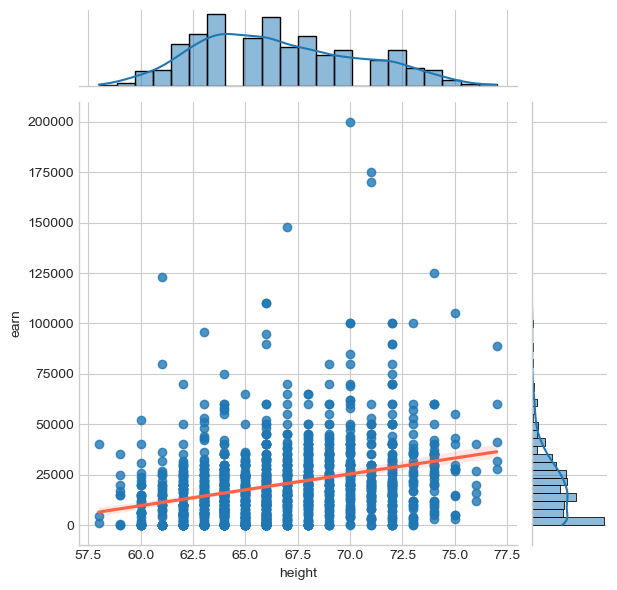

In [39]:
sns.jointplot(x = df['height'], y = df['earn'], kind='reg', line_kws = {'color':'tomato'})

El diagrama ejecutado entrega la siguiente información:

1.	El diagrama nos informa de una **`asociación positiva entre ambas variables`**. Una salvedad a rescatar es que la asociación entre ambas es relativamente débil (su r de Pearson es de .30).
2.	La baja correlación puede ser explicada por la distribución de las variables. Mientras que height presenta una distribución relativamente normal, earn está fuertemente sesgada hacia valores bajos.
3.	Otro motivo que pueda estar influyendo levemente es que, si nos fijamos en los valores que toma la variable `height` de la tabla entregada por el método `describe()`, los valores al parecer fueron redondeados (min, max y los cuartiles son números enteros), esta es la razón también de que se vean 'franjas' en el gráfico de dispersión.


Para examinar la normalidad de nuestras variables, `statsmodels` presenta un gráfico de normalidad Q-Q (Quantile - Quantile).

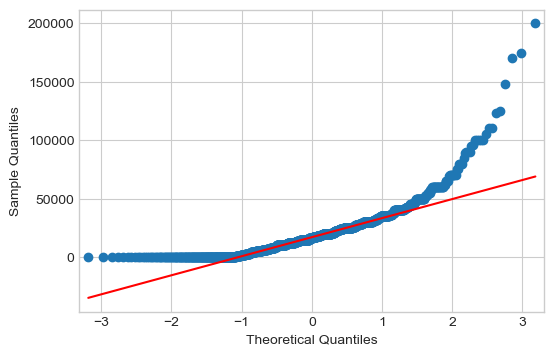

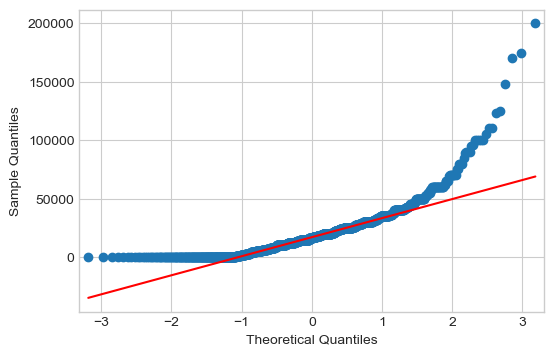

In [40]:
sm.qqplot(df['earn'],line='q')

En el gráfico podemos observar que la variable escapa de los valores esperados en los extremos de la distribución. Ésto es un punto a considerar en la modelación que veremos más adelante.

El gráfico Q-Q compara la distribución empírica de nuestra variable en el eje Y (con la etiqueta 'Sample Quantities') contra la distribución esperada de la variable (bajo la etiqueta 'Theoretical Quantities').

La opción `line='q'` permite trazar una línea entre cantidades observadas y esperadas en los cuantiles de nuestra variable. Una distribución normal tendrá la mayoría de sus datos cercanos a la línea.

Si ejecutamos el mismo diagnóstico para heigth, el resultado es distinto.

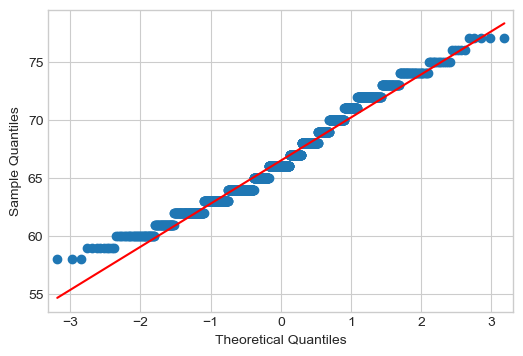

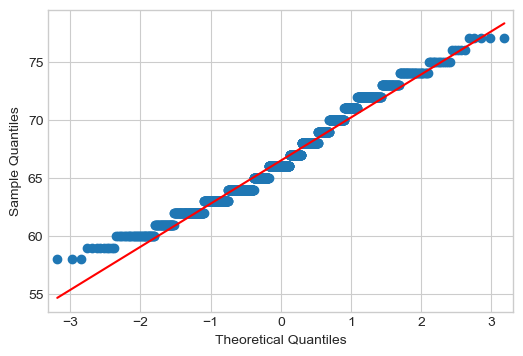

In [41]:
sm.qqplot(df['height'], line='q')

##### **2 - Inspeccionando contribuciones en nuestra variable dependiente: Regresión Lineal**

Una vez realizado las principales exploraciones, nuestro objetivo es generar una explicación plausible de cómo la altura de los individuos afecta los niveles de ingreso en promedio. Para ello utilizaremos la regresión lineal, un método que permite extraer información sobre cómo una variable independiente contribuye en una variable dependiente.

La regresión lineal es un método que resume cómo los valores de una variable objetivo de característica numérica varían en subpoblaciones definidas por una función lineal de atributos. Esta definición proviene de Gelman & Hill (2007) y pone énfasis en la característica descriptiva de la regresión por sobre la idea causal.

Si bien la regresión puede utilizarse para representar asociaciones causales, preferimos enfatizar la capacidad de presentar comparaciones de promedios entre dos subpoblaciones. Así somos explícitos sobre las limitantes de la regresión al no considerar los supuestos de inferencia causal.

##### **3 - Nuestra primera regresión**

Nuestro primer modelo a ejecutar tendrá la siguiente especificación:

$$ earn_i = \beta_0 + \beta_1 height_i + \varepsilon_i $$

Donde buscamos generar un modelo que explique la varianza de `earn` en función a `height`. En la ecuación agregamos un `εi` para tomar en cuenta la incertidumbre de nuestro modelo. Volveremos a este punto cuando discutamos los supuestos que le dan validez al modelo (Teorema de Gauss-Markov).

El objetivo del algoritmo es generar estimaciones respecto al intercepto (expresado como `β0`, que representa el punto de partida de la función lineal) y de la pendiente (expresada como `β1`, que representa la contribución de X en Y cuando X cambia en 1 unidad).
 
Para implementar nuestra primera regresión generamos un objeto a partir de `smf.ols`, el cual genera un modelo de regresión mediante el `Método de Mínimos Cuadrados (Ordinary Least Squares)`. La función de statsmodels toma como mínimo dos parámetros:

1.	La declaración de la ecuación, que se realiza mediante sintáxis Patsy* con la siguiente forma canónica:
```
                                                    '<objetivo> ~ <atributos>'
```
2.	Un objeto `data`, que en este caso responde a nuestro `pd.DataFrame` generado con pandas.

-	La forma canónica permite separar entre nuestro fenómeno a estudiar y los atributos a agregar, separándolos por el operador `~`, el cual define que el objetivo se puede explicar a partir de una función que contiene los atributos.
-	Mediante `smf.ols()` pasamos la función y una tabla de datos para generar un objeto con clase `statsmodels.regression.linear_model.OLS`.

In [42]:
# generamos un objeto que contenga nuestra ecuación descrita 
model1 = smf.ols('earn ~ height', data = df)

In [46]:
model1 = smf.ols('earn ~ height', data = df).fit()
# Para la recta ---> y = a + bx + e
# a = Intercept, b = height
model1.params

Intercept   -84868.101530
height        1574.410254
dtype: float64

In [43]:
# pidamos la extensión de la clase en nuestro objeto. 
model1.__class__

statsmodels.regression.linear_model.OLS

-	Hasta el momento sólo hemos generado un objeto con la clase detallada. Para generar las estimaciones de nuestro modelo, debemos ejecutar el método `.fit()`, que instruye al objeto para estimar los parámetros.

In [44]:
model1 = model1.fit()

-	Una vez que el modelo ya está estimado, podemos solicitar sus resultados mediante `.summary()`

In [45]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.65e-30
Time:                        18:41:56   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **4 - Interpretación de un modelo de regresión**

`statsmodel` por defecto entrega variada información respecto a la ejecución, estadísticos de bondad de ajuste y los parámetros estimados.

**`Estadísticos de Bondad de Ajuste`**: (R-squared, Adj. R-squared, F-statistic, Prob(F-statistic), No.Observations, etc...): Informan aspectos generales sobre nuestro modelo tales como su capacidad explicativa.

1.	**`R-squared y Adj R-squared`**: `R2` busca resumir en una cifra cuál es la capacidad explicativa de nuestros regresores (variables independientes) en la variabilidad de nuestro objetivo (variable dependiente). Para nuestro modelo ejecutado, la variabilidad de los ingresos en la muestra se explica en un 9.2% por la altura de los individuos en la muestra. También se entrega un Adj. R-squared que entrega un estadístico similar al R-squared, pero penalizado por la cantidad de parámetros a estimar. Dado que no hay más parámetros a estimar, las diferencias entre ambos no son sustanciales.

2.	**`F-statistic y Prob(F-statistic)`**: La prueba F surge de la distribución , que describe el rango de variabilidad entre partes explicadas y no explicadas. El valor de F se contrasta a un puntaje de corte. En esta prueba se genera una hipótesis nula donde el modelo no es estadísticamente válido, y una hipótesis alternativa donde el modelo es estadísticamente válido. Estas reglas se simplifican en `Prob(F-statistic)`, donde evaluaremos que sí `Prob(F − statistic) ≤ 0.05`, tenemos evidencia en contra de la hipótesis nula y hay más evidencia a favor de la significancia estadística general del modelo.

3.	**`Log-Likelihood (Log-Verosimilitud)`**: Es el valor del logaritmo de la verosimilitud para el modelo ajustado, un valor a veces reportando también por algunas librerías es `LL-Null`, el cual corresponde al valor de la log-verosimilitud del modelo sin variables independientes, este sirve para poder comparar el ajuste de nuestro modelo a los datos con respecto a un modelo sin predictores.
 
4.	**`AIC (Criterio de información de Akaike)`**: Es una métrica de calidad relativa del ajuste de un modelo a los datos, esto significa que debe ser comparado siempre con respecto al valor AIC de otros modelos entrenados sobre los mismos datos y bajo
las mismas condiciones. AIC Se define como:

$$ AIC = 2k − 2ln\hat{(L)} $$

- Donde `k` es la cantidad de parámetros estimados por el modelo (En nuestro caso, estos serían la cantidad de coeficientes `βi` ) y `L` es el valor de la máxima verosimilitud para el modelo. AIC sirve como métrica para selección de modelos, interesandonos siempre el modelo con menor AIC de entre los modelos candidatos (siempre y cuando, estemos comparando modelos ajustados bajo los mismos datos/condiciones). Podemos ver que esta métrica penaliza a un modelo por la cantidad de parámetros que este implementa (k) por lo que esta métrica tiende a preferir modelos más parsimoniosos. Hay que notar que AIC no nos entrega una métrica con interpretación directa para evaluar la bondad de ajuste del modelo a los datos, por lo que perfectamente podríamos seleccionar, de entre una batería de modelos, aquél con menor AIC y esto no sería garantía alguna de que ese modelo en efecto tenga un buen performance, una buena idea es entonces complementar esta selección mediante AIC con una métrica de error absoluto.

- Finalmente, aunque en este sumario de regresión no aparece, a veces es reportado en algunas librerías un valor mostrado como "`AICc`" el cual hace referencia a una versión de AIC corregido para los casos de tamaños muestrales pequeños.

5.	`BIC (Criterio de Información Bayesiano)`: Funciona de forma similar a AIC en el sentido de ser una métrica de ajuste relativo que debe ser comparada de entre los valores obtenidos para un conjunto de modelos candidatos, prefiriendo siempre aquél con menor valor de BIC. Cómo se mencionó anteriormente, AIC intenta penalizar la sobre parametrización de modelos, lo cual puede resultar en un sobreajuste. La diferencia entre BIC y AIC es que BIC penaliza de mayor manera la sobre parametrización. La fórmula de BIC es la siguiente:
 

$$ BIC = k ln(n) − 2ln\hat{(L)} $$
 

- Donde `k` es la cantidad de parámetros estimados por el modelo, `n` es la cantidad de elementos en la muestra (número de observaciones) y `L` es la verosimilitud máxima del modelo.
 

6. `Parámetros Estimados`: La parte substancial del modelo se encuentra en su estimación paramétrica. Se estiman `p + 1` parámetros, donde `p` es la cantidad de atributos a incluir en la fórmula. El `p + 1` surge de la estimación del intercepto (`β0`), el punto de partida de nuestra recta. Por cada atributo agregado, se genera un `β`. Los parámetros se reportan con una serie de estadísticos asociados:

    -	`coef`: El parámetro estimado en sí.
    -	`std err`: El error estándar asociado al parámetro.
    -	`t`: El valor crítico del coeficiente.
    -	`P > |t|`: El valor p que pone a prueba la significancia estadística del coeficiente.
    -	`[0.025 0.975]`: El intervalo de confianza al 95% del parámetro.

- El `intercepto` informa sobre el punto de partida de nuestra recta. En nuestro primer modelo, nos sugiere que un individuo en la muestra con 0 pulgadas de altura tendrá en promedio un salario de 8487 dólares. La estimación de este coeficiente es significativa al 95% (nuestro valor p es menor a 0.05). El problema de esta interpretación del intercepto es que no tiene mucho sentido. No existen personas con 0 pulgadas. Para esto, hay que considerar el hecho que nuestro intercepto tiene sentido sólo en el contexto de nuestro modelo. Para tener una visión general, debemos considerar la pendiente de nuestra variable independiente.

- El `coeficiente de height` informa en cuánto cambia nuestro Y cuando x aumenta en 1 unidad. Con un valor estimado de 1574 estadísticamente significativo al 95%, esperamos que la diferencia entre dos individuos de similares características que difieren sólo en una pulgada, sea de $1574 dólares. Podemos tentarnos de interpretar este coeficiente desde la causalidad: en la medida que un individuo crezca una pulgada, esperamos un incremento en su salario de 1574 dólares. Esta interpretación presenta una serie de problemas asociados a la causalidad:

    -	La interpretación es menos flexible, puesto que forzamos un determinado flujo causal. `height → earn` implica que de forma irrestricta el salario subirá en la medida que la altura aumenta. Esto obliga al investigador a generar contrafactuales sin observaciones empíricas (`¿Qué pasa con un individuo que por X motivo disminuye su altura?`).
    -	La interpretación causal también asume diseños estadísticos sofisticados, como series de panel, donde se realizan seguimientos a una muestra de individuos de forma temporal.
    -	La interpretación causal impone una serie de supuestos difíciles de comprobar fuera de la estadística, asociados al diseño.


##### **5 - Validez de las estimaciones**

Para entender la validez de nuestras estimaciones mediante Mínimos Cuadrados Ordinarios, es necesario estudiar someramente cómo se generan.

La obtención paramétrica de los β descansa en el método de mínimos cuadrados (MCO).

El objetivo del MCO es `encontrar un estimador que reduzca la distancia residual entre los valores predichos y sus correlatos observados`.

Bajo este enfoque, se asume que los parámetros verdaderos (o poblacionales) son desconocidos y buscamos generar aproximaciones.

Si tenemos un modelo con la siguiente forma:

$$ Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i $$

Buscamos un estimador que minimice la suma de errores cuadráticos:

<center><img src="https://i.postimg.cc/02jj7Cpw/dl35.png"></center>

`Observación`: **MCO** es un método intuitivo y fácil de entender y programar, sin embargo, está lejos de ser perfecto, una de las más grandes debilidades de **MCO** es que es extremadamente sensible a valores extremos (outliers), ya sea porque los puntos (**xi , yi**) son muy pequeños o demasiado grandes en comparación con el resto de la muestra, en estos casos el cuadrado de la distancia es una cantidad que puede llevar a desequilibrar por completo la recta de la regresión, los casos en que estos outliers son producto del error humano o de instrumentación pueden ser fatales para el modelo.

En la figura generada con `gfx.gauss_markov()` se presentan tres posibles estimadores candidatos para encontrar nuestro parámetro verdadero (`β`). Éstos difieren en sus componentes paramétricos, asumiendo que se comportan de forma asintóticamente normal

$$ \widehat{\beta_j} \sim N () $$

-	Nuestra primera estimación `β1` tiene una media similar a nuestro parámetro verdadero, pero su varianza es grande.

-	Nuestra segunda estimación `β2` tiene una media superior al parámetro verdadero y una varianza similar a la primera estimación.

-	Nuestra tercera y última estimación `β3` tiene una media idéntica a la primera estimación, pero una menor varianza 
 
-	En este caso, la estimación `β2` falla en capturar el parámetro poblacional, por lo que es descartada 
 
-	Entre la estimación `β1` y `β3` , ésta última satisface las condiciones de Gauss-Markov, dado que su varianza es menor y asegura que error tendrá una media menor.
-	El cumplimiento de las condiciones de Gauss Markov nos asegurará que el estimador será el estimador lineal insesgado y óptimo, obteniendo el estimador eficiente dentro de la clase de estimadores lineales insesgados.



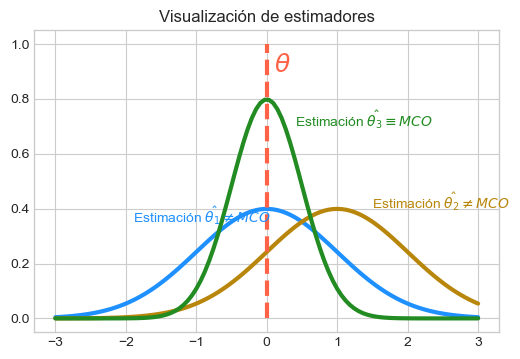

In [51]:
gfx.gauss_markov()

##### **6 - ¿Cuáles son las condiciones de Gauss-Markov?**

El teorema de Gauss-Markov descansa en cinco supuestos:

1.	**La media del error es 0** `(E[εi] = 0)`: No hay sesgo sistemático de forma positiva o negativa respecto a los errores muestrales. Su media será 0 para estos casos. Surge de este supuesto que cuando X es igual a su media, Y también lo será.
 
2.	**Independencia del error y las variables explicativas** `(E[εi|Xi] = 0)`: Los residuos no están determinados por la variable explicativa.

3.	**Ausencia de correlación entre los residuos** `(E[εi|εj] = 0(i =/ j))`: Los residuos de las observaciones distintas deben ser estadísticamente independientes. La información del residuo para uno caso no debe afectar el signo o valor de los residuos para otros casos. Ante los casos de correlación existente entre los residuos, hablamos de correlación serial o correlación espacial.

4.	**Ausencia de correlación entre la varianza y las variables** (`E[εi 2] = constante`): La varianza de los errores en cualquier valor de X debe ser independiente a X e Y .

5.	**Distribución normal de los errores** `(εi ~ N(0, σ2))`: Se asume que los errores deben tener una distribución empírica cercana a la normal para todo el rango de X 


##### **7 - Digresión: ¿Qué supuestos son los más relevantes?**

Gelman y Hill (2007) sugieren que los supuestos se pueden ordenar de más importantes a menos importantes.

1.	`Validez`: Los datos que analizamos deben estar relacionados con la pregunta de investigación que se busca responder. Suena obvio, pero muchas veces se obvia.

2.	`Aditividad y Linealidad`: El supuesto más importante desde la matemática es que el componente determinístico (la ecuación) es una función lineal de los predictores.

3.	`Independencia de los errores`: Los errores deben estar libres de correlaciones entre sí mismos y no deben afectar a las demás mediciones.

4.	`Normalidad de los errores`: Generalmente no es problemático el tener distribuciones no-normales, puesto que se pueden aplicar transformaciones como log(x) , √x , 1/x


##### **8 - Diagnósticos de nuestro modelo**

Para comprobar los supuestos Gauss-Markov mencionados arriba, la inspección más intuitiva es mediante gráficos.

`statsmodels` presenta `plot_regress_exog`, que entrega cuatro gráficos respecto a nuestro modelo de regresión:

1.	`Y and Fitted vs. X`: Grafica los valores predichos (y) y valores empíricos a lo largo de X. Sirve para visualizar en qué valores de X se genera una mejor predicción de los valores empíricos. Observamos que hay valores que se escapan sustancialmente de lo predicho cuando la altura es cercana a las 70 pulgadas.

2.	`Residuals versus X`: Permite visualizar la heterocedasticidad del modelo al graficar el error residual (εi) a lo largo de nuestra variable exógena. Si encontramos una tendencia lineal en la nube de datos. En base al gráfico observamos un patrón de embudo, donde en la medida que aumenta la altura los errores tienden a variar más. Podemos decir que el predictor es heterocedástico en el modelo y necesitamos corregir.

3.	`Partial regression plot`: Grafica la evolución de la expectativa de la variable dependiente condicional a los valores de la variable independiente estandarizada.

4.	`CCPR Plot (Component and Component Plus Residual)`: Generan un gráfico entre el componente (X) y los residuales de predicción. Permiten diagnosticar espeficicaciones a la variable.

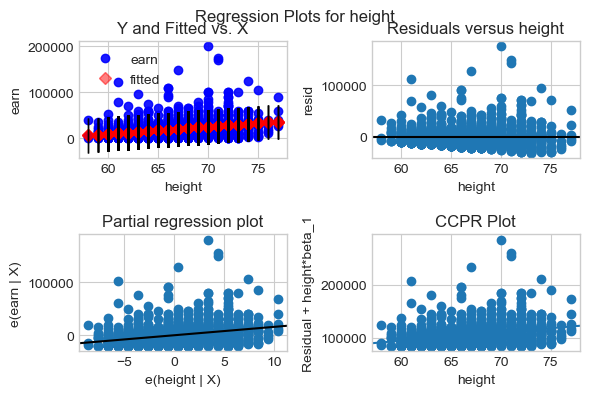

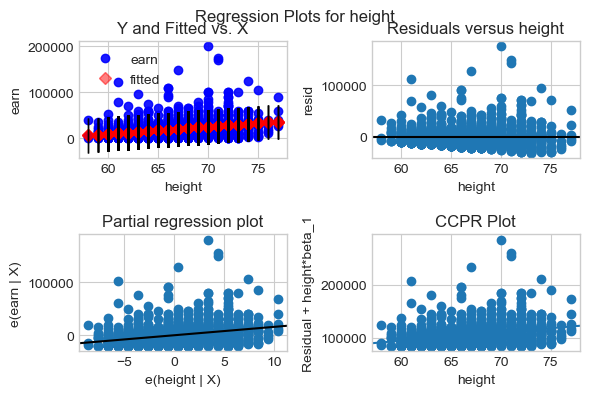

In [52]:
sm.graphics.plot_regress_exog(model1, 'height')

### **`Variables independientes binarias y sus amigas`**

#### **1 - Introducción**

Los supuestos de Gauss Markov de la regresión hacen referencia a los errores y estamos limitados por la naturaleza contínua de la variable dependiente a analizar. Podemos flexibilizar nuestro modelo al incluir distintas operacionalizaciones de las variables independientes.

#### **2 - Regresión con una variable binaria**

Ahora ejecutaremos una regresión donde nuestra variable independiente toma dos valores: 1 para hombres y 0 para mujeres. Ésta variable se conoce como binaria y permite identificar atributos simples en una muestra.

Deseamos ver el efecto que tiene el ser hombre en el salario. Nuestro modelo queda de la siguiente forma:

$$ earn_i = \beta_0 + \gamma_1 \, \times \text{male} + \varepsilon_i $$
 
Donde `β0` es nuestro parámetro estimado para el intercepto e `γ1` es el parámetro estimado para la diferencia entre hombres y mujeres en ingreso. 

Cabe destacar que este modelo es el equivalente a una prueba de hipótesis entre 2 muestras independientes.

Si solicitamos un gráfico de cajas entre ambas variables, observamos que el rango del salario para los hombres es mucho mayor que el de las mujeres y la mediana se sitúa en salarios más altos.

In [53]:
df.loc[df['male'] == 0 ]['earn'].quantile(.75) - df.loc[df['male'] == 0]['earn'].quantile(.25)

19125.0

<AxesSubplot:xlabel='male', ylabel='earn'>

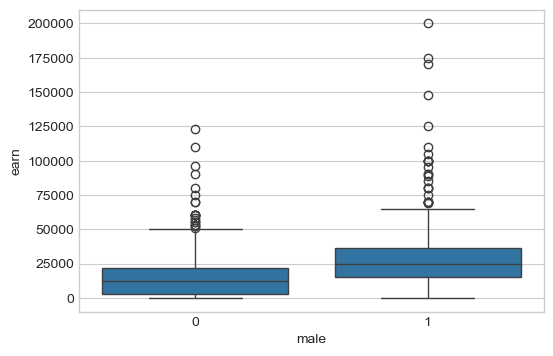

In [54]:
sns.boxplot(x=df['male'], y=df['earn'])

#### **3 - Digresión: Sobre las variables binarias**

En muchas ocasiones nuestro interés es estimar el efecto de un atributo binario (donde 1 indica la presencia de éste y 0 la ausencia) en nuestra variable objetivo. La convención es siempre como 0 aquella característica más común, dado que podemos capturar el comportamiento más común mediante el intercepto.

Si ejecutamos el modelo con una variable binaria de forma `'earn ~ male'`, observamos que el sexo del individuo explica en un 12.4% la variabilidad en el salario de la muestra (esto al ver el R-squared reportado). El intercepto sugiere que para las mujeres el salario promedio es de 14,560 dólares, mientras que los hombres presentan una diferencia de 14,380 dólares más en promedio. Ambos coeficientes son significativos al 99%.

In [55]:
model_dummy = smf.ols('earn ~ male', data = df).fit() 
model_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           1.95e-41
Time:                        12:53:40   Log-Likelihood:                -15450.
No. Observations:                1374   AIC:                         3.090e+04
Df Residuals:                    1372   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+04    632.986     23.004      0.000    1.33e+04    1.58e+04
male        1.438e+04   1030.915     13.946      0.000    1.24e+04    1.64e+04
==============================================================================
Omnibus:                      864.521   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13531.216
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **4 - Regresión con una variable polinomial**

Otro aspecto que podemos mejorar cuando incluimos variables es considerar `no linealidades en las variables independientes`. Consideremos el caso donde incluímos la edad del individuo al modelo, que quedaría de la siguiente manera:

$$ earn_i = \beta_0 + \beta_1 \, \times \text{age} + \varepsilon_i $$

Resulta que podemos pensar que los individuos con mayor edad tienden a percibir menores niveles de ingreso, dado que tienen menor poder de negociación y están más cerca de la jubilación. Para ello podemos incluir un término cuadrático para considerar el hecho que el salario puede bajar en función de la edad. Nuestro modelo quedaría así:

$$ earn_i = \beta_0 + \beta_1 \, \times \text{age} + \beta_2 \, \times \text{age}^2 + \varepsilon_i $$

Primero visualicemos la recta con sns.regplot:

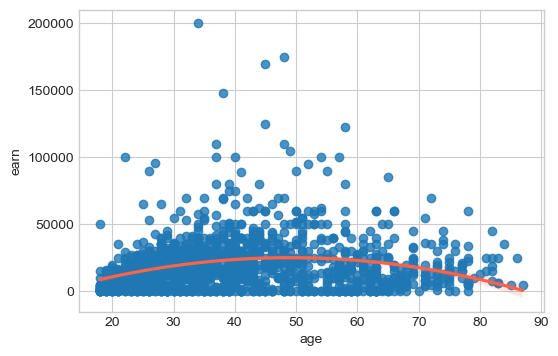

In [57]:
# generamos un scatterplot entre age y earn 
sns.regplot(x=df['age'], y=df['earn'],
# donde definimos que estimaremos una recta con dos grados polinomiales
order=2,
# y declaramos el color de la recta para diferenciar. 
line_kws={'color':'tomato'});

Se aprecia que la recta indica una parábola negativa: esperamos un peak en el salario percibido cuando los individuos están cerca a los 50 años de edad, declinando después de esa edad.

Ahora generemos el modelo:

In [58]:
# generamos una nueva columna que guarde los resultados de elevar al cuadrado la edad
df['age_sq'] = df['age'] ** 2
# iniciamos el modelo incluyendo ambos términos 
model3= smf.ols('earn ~ age + age_sq', data=df).fit() 
# pedimos los resultados
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     41.06
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           4.80e-18
Time:                        13:14:24   Log-Likelihood:                -15501.
No. Observations:                1374   AIC:                         3.101e+04
Df Residuals:                    1371   BIC:                         3.102e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.566e+04   3975.144     -3.940      0.000   -2.35e+04   -7863.055
age         1664.1728    184.765      9.007      0.000    1301.719    2026.626
age_sq       -16.9734      1.956     -8.678      0.000     -20.810     -13.137
==============================================================================
Omnibus:                      843.307   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12732.413
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      16.988   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para que la variable sea "significativa" al 95% de confianza se busca rechazar la Hipotesis nula, es decir, que la media de la variable sea igual a 0:

$$ H_0 = 0 $$
$$ H_1 \neq 0 $$

Entonces:

- El estadistico `t` debe ser mayor a 1.96 ó
- El P valor debe ser menor a 0.05 (`P>|t|`) ó
- El intervalo [`0.025  0.975`] no contenga el 0

Puedo utilizar cualquiera de las 3, siempre van a coincidir

In [63]:
pd.DataFrame(model3.summary().tables[1].data)

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,Intercept,-1.566e+04,3975.144,-3.940,0.000,-2.35e+04,-7863.055
2,age,1664.1728,184.765,9.007,0.000,1301.719,2026.626
3,age_sq,-16.9734,1.956,-8.678,0.000,-20.810,-13.137


El modelo presenta observaciones similares a las del gráfico, mientras que el primer término indica que hay una diferencia de 1.664 dólares entre dos individuos que difieren en 1 año; el segundo término indica una penalización de 16 dólares entre dos individuos que difieren en un año de edad cuando superan la cúspide de ingresos.

#### **5 - Regresión con más de una variable independiente**

El modelo de regresión se puede expandir en la cantidad de variables independientes a incluir en la ecuación, dando pie a una regresión `lineal múltiple`. Agregar variables responde a variados objetivos:

-	Para mejorar nuestra capacidad descriptiva de un modelo y mejorar nuestro entendimiento de las relaciones presentes entre los datos.
-	Para mejorar nuestra capacidad predictiva en la medida que incluímos más información.
-	Para considerar de forma explícita problemas causales como las variables intervinientes y controlar por mecanismos alternativas.

Vamos a generar una regresión con la siguiente forma:

$$ earn_i = \beta_0 + \beta_1 \, \times \text{ed} + \gamma_2 \, \times \text{male=1} + \varepsilon_i $$

donde modelamos el efecto que tiene la educación y el sexo del individuo en cuánto salario percibe. Para incluir más de un regresor en nuestra sintáxis de statsmodels, procedemos de la siguiente manera: `'variabledependiente ~ varindp1 + varindp2'`.

In [59]:
model2 = smf.ols('earn ~ ed + male', data=df) 
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     206.4
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           4.42e-79
Time:                        13:31:43   Log-Likelihood:                -15361.
No. Observations:                1374   AIC:                         3.073e+04
Df Residuals:                    1371   BIC:                         3.074e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.064e+04   2613.174     -7.898      0.000   -2.58e+04   -1.55e+04
ed          2660.1759    192.327     13.832      0.000    2282.889    3037.462
male        1.352e+04    968.064     13.968      0.000    1.16e+04    1.54e+04
==============================================================================
Omnibus:                      829.868   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12917.525
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      17.154   Cond. No.                         76.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para que la variable sea "significativa" al 95% de confianza se busca rechazar la Hipotesis nula, es decir, que la media de la variable sea igual a 0:

$$ H_0 = 0 $$
$$ H_1 \neq 0 $$

Entonces:

- El estadistico `t` debe ser mayor a 1.96 ó
- El P valor debe ser menor a 0.05 (`P>|t|`) ó
- El intervalo [`0.025  0.975`] no contenga el 0

Puedo utilizar cualquiera de las 3, siempre van a coincidir

Para facilitar nuestro entendimiento respecto al modelo, debemos tener las siguientes consideraciones:

-	Cada parámetro se interpreta de forma individual siguiendo el principio `ceteris paribus`: todas las demás variables consideradas en el modelo pero no interpretadas se asumen que se mantienen constantes en la media.
-	La predicción de valores en nuestra variable dependiente se asume como la `suma de todos los coeficientes estimados del modelo`. Esto se conoce como la propiedad aditiva de la regresión lineal.

En este caso nuestra regresión considera una variable continua y una variable binaria. Para este caso es útil separar nuestra ecuación detallada en dos posibles estimaciones:

-	Una `Ecuación para Hombres` donde se considera el parámetro estimado male:

$$ earn_i = \beta_0 + \beta_1 \, \times \text{ed} + \gamma_2 \, \times \text{male=1} + \varepsilon_i $$

-	Una `Ecuación para Mujeres` donde la ausencia de atributo male implica que el parámetro estimado no se incluye en esa estimación:

$$ earn_i = \beta_0 + \beta_1 \, \times \text{ed} + \gamma_2 \, \times \text{male=0} + \varepsilon_i \implies earn_i = \beta_0 + \beta_1 \, \times \text{ed} + \varepsilon_i $$

Siguiendo nuestro modelo, se aprecia que si bien la diferencia en los salarios entre dos personas con similares características pero que difieren en un año de educación es de 2660 dólares. De manera similar a nuestro modelo binario, la diferencia entre hombres y mujeres en los salarios es de 13520 dólares en promedio.

Para entender de una manera más clara el impacto de male, generaremos un gráfico de líneas paralelas.

In [60]:
# una buena práctica es generar copias de nuestro objeto para evitar modificación.
df_dummy = df.copy()

model_3 = smf.ols('earn ~ ed + male', df).fit()

# ahora guardemos los valores predichos de nuestro modelo en nuestra base.
df_dummy['yhat'] = model_3.predict() 
df_dummy.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male,age_sq,yhat
3,50000.0,6,2,1,1,2,16,45,74,45,2,3,1,2025,35444.862717
4,60000.0,5,6,2,1,2,16,32,66,58,3,3,0,3364,21923.423771
5,30000.0,5,4,2,1,2,16,61,64,29,1,3,0,841,21923.423771
9,51000.0,5,3,2,1,2,17,51,63,39,2,3,0,1521,24583.599688
10,9000.0,5,4,2,1,2,15,64,64,26,1,3,0,676,19263.247854


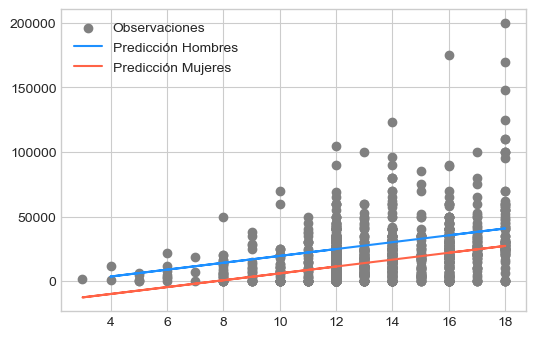

In [61]:
# comencemos por graficar todos los puntos en la relación 
plt.scatter(df_dummy['ed'], df_dummy['earn'], color='grey', label = 'Observaciones')

# grafiquemos la proyección para hombres 
plt.plot(df_dummy.query('male == 1').ed, 
         df_dummy.query('male == 1').yhat,
         color = 'dodgerblue', label = 'Predicción Hombres')

# grafiquemos la proyección para mujeres 
plt.plot(df_dummy.query('male == 0').ed, 
         df_dummy.query('male == 0').yhat,
         color = 'tomato', label = 'Predicción Mujeres') 

plt.legend()

El efecto estimado de ser hombre en el salario se mantiene de forma constante en la medida que cambiamos el valor de la educación.

### **`Machine Learning`**

#### **1 - Introducción**

Una de las principales diferencias entre la estadística, machine learning e inteligencia artificial es cómo se refieren a las variables, Mientras que en la estadística (y la tradición más académica) se habla de variables dependientes (el fenómeno a estudiar) e independientes (atributos que pueden explicar la variable dependiente), en machine learning se habla de atributos y objetivos.

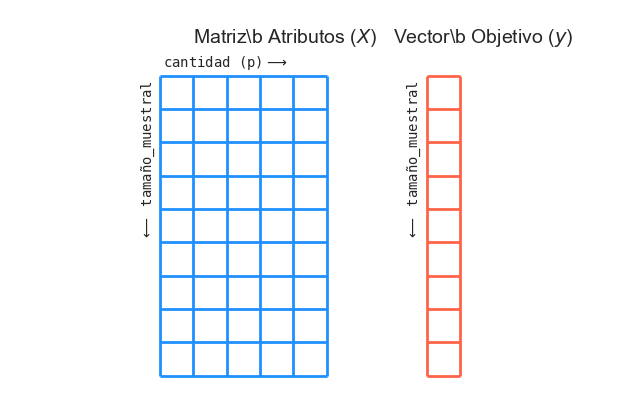

In [64]:
gfx.feature_target()

En machine learning se suele considerar la matriz de atributos (`X`) y el vector objetivo (`y`) como entidades separadas. El por qué hace referencia a la finalidad de generar buenas predicciones a partir de la matriz de atributos, no el discriminar entre distintas variables pertenecientes a X .

#### **2 - El flujo de trabajo desde Machine Learning**

##### `Primer elemento: Conocer los datos`

Los datos son observaciones de fenómenos empíricos. Cada uno de ellos provee información (limitada) sobre un aspecto de nuestro fenómeno a estudiar. La colección de todos los datos nos permite dar una panorámica (aún incompleta) sobre el fenómeno.
Es sano asumir que todos los datos vienen con información faltante y ruido de medición.

##### `Segundo elemento: Determinar los objetivos de Trabajo`

El tipo de datos a disposición limita el tipo de objetivos de trabajo. Más que un fin en sí, los objetivos permiten fijar las preguntas de investigación. Los objetivos de trabajo también permiten definir la arquitectura y modelos que se utilizarán.

##### `Tercer elemento: Diseñar e implementar los Modelos`

La elección del modelo viene determinada parcialmente por los objetivos de trabajo y los datos disponibles.

Algunos elementos a considerar:

-	¿Qué esperamos como resultado?
-	¿Qué parámetros estimaremos?
-	¿Qué hiperparámetros consideraremos?

Los parámetros son aquellos elementos que se generan mediante los algoritmos o métodos de estimación. Éstos no son gobernados directamente por el investigador.

Los hiperparámetros son los elementos que se determinan por el investigador e influyen en los parámetros a estimar. Ejemplos de hiperparámetros son el porcentaje de datos que se distribuyen en los subconjuntos train y test, la inclusión de un parámetro basal como `β0`, la normalización de la matriz de datos, entre otros.

#### **3 - Nuestro primer modelo desde Machine Learning con `scikit-learn`**

##### `Introducción`

Para nuestro primer modelo utilizaremos la misma base de datos `earnings.csv`, donde **buscaremos predecir los ingresos de individuos a partir de una serie de características registradas**.

Utilizaremos `scikit-learn`, una librería diseñada para implementar modelos de minería de datos y machine learning de manera simple y efectiva. Opera con componentes de numpy, scipy y matplotlib para facilitar la labor del investigador.

En énfasis en la facilidad de uso, rigurosidad en el código, amplia comunidad de apoyo y buena documentación la han transformado en `la principal librería de análisis enfocado a la predicción`. Para más información sobre scikit-learn, vea la página oficial.

##### `Paso 1: Importación de módulos`

Dado la vasta cantidad de funciones en la librería, se sugiere importar los módulos específicos que utilizaremos. Esto conlleva un trabajo de identificar todos los argumentos requeridos en las funciones.

Para generar un modelo lineal necesitamos el módulo `linear_model`, que importaremos mediante `from <...> import <...>`.

Posteriormente importamos las métricas de evaluación alojadas en `sklearn.metrics`.

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

##### `Paso 2: Dividiendo la muestra`

Otra de las características del machine learning es la división de las muestras entre dos grupos:

1.	**Training Set**: Donde implementamos el modelo.
2.	**Test Set**: Donde probamos el modelo.

El siguiente paso es poder dividir la muestra en cuatro partes. La división se puede ejemplificar en la figura `gfx.train_testing()`. En ella generamos una división de nuestra matriz ingresada al ambiente de trabajo, teniendo en cuenta los siguientes aspectos:

1.	La división debe realizarse entre una muestra que utilizaremos para generar una representación fidedigna del fenómeno.
2.	Una muestra donde vamos a poner a prueba nuestra estimaciones y contrastaremos lo predecido con las observaciones reales.

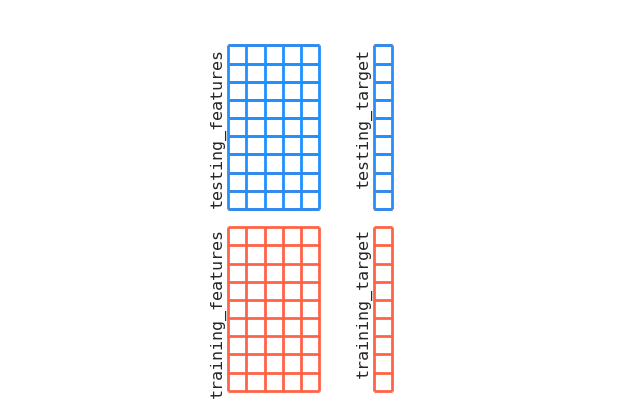

In [66]:
gfx.train_testing()

<center><img src="https://i.postimg.cc/KYgr8bhT/ml.png"></center>

Necesitamos generar las muestras mediante el operador slice de pandas. Los cuatro grupos que debemos crear son:

1.	Matriz de Atributos en Training Set: `X_mat_train`
2.	Vector Objetivo en Training Set: `y_train`
3.	Matriz de Atributos en Testing Set: `X_mat_test`
4.	Vector Objetivo en Testing Set: `y_vec`

Para generar nuestra matriz de atributos, es necesario excluir el vector objetivo.

In [68]:
df = pd.read_csv('earnings.csv')
df.shape

(1374, 14)

In [69]:
df.head()

,Unnamed: 0,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
0,3,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
1,4,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
2,5,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
3,9,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
4,10,9000.0,5,4,2,1,2,15,64,64,26,1,3,0


In [129]:
# Generemos un nuevo objeto llamado attr_mat que excluya Unnamed: 0 y earn 
attr_mat = df.drop(['Unnamed: 0', 'earn'], axis=1)

In [130]:
attr_mat.head()

,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
0,6,2,1,1,2,16,45,74,45,2,3,1
1,5,6,2,1,2,16,32,66,58,3,3,0
2,5,4,2,1,2,16,61,64,29,1,3,0
3,5,3,2,1,2,17,51,63,39,2,3,0
4,5,4,2,1,2,15,64,64,26,1,3,0


Ahora generamos la división entre muestra de entrenamiento del modelo y muestra de prueba del modelo. Por ahora nuestra aproximación es excluir las últimas 30 filas en nuestra muestra de entrenamiento, y agregarlas a nuestra muestra de prueba. Repetimos exactamente el mismo proceso para el vector objetivo.

In [171]:
# dividir matriz de atributos 
X_mat_train = attr_mat[:-30] 
X_mat_test = attr_mat[-30:]

# dividir vector objetivo 
y_train = df['earn'][:-30]
y_test = df['earn'][-30:]

El método que acabamos de utilizar para separar nuestros conjuntos de entrenamiento y prueba se le conoce comúnmente como '**`máscara estática`**', la razón de esto es porque podemos ejecutar el bloque de código anterior las veces que queramos y siempre obtendremos los mismos valores en cada conjunto, en nuestro caso el conjunto de entrenamiento se compone de todas las filas excepto las últimas 30, mientras que el de pruebas se compone solo de esas 30 últimas.

In [154]:
X_mat_train.tail()

,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
1339,5,4,2,1,2,10,51,64,39,2,3,0
1340,5,7,1,1,2,10,12,67,78,3,3,1
1341,5,8,1,1,2,11,58,68,32,1,3,1
1342,5,6,2,1,2,12,66,66,24,1,3,0
1343,5,6,2,1,2,14,47,66,43,2,3,0


In [142]:
X_mat_train.shape

(1344, 12)

In [155]:
X_mat_test.head()

,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
1344,5,6,2,1,2,16,31,66,59,3,3,0
1345,5,7,1,1,2,12,13,67,77,3,3,1
1346,5,6,1,1,2,12,53,66,37,2,3,1
1347,5,3,2,1,2,9,39,63,51,3,3,0
1348,5,8,2,1,2,13,47,68,43,2,3,0


In [143]:
X_mat_test.shape

(30, 12)

In [172]:
y_train.sort_index()

0       50000.0
1       60000.0
2       30000.0
3       51000.0
4        9000.0
         ...   
1339     7000.0
1340     7000.0
1341    30000.0
1342     3000.0
1343    20000.0
Name: earn, Length: 1344, dtype: float64

In [173]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1344 entries, 0 to 1343
Series name: earn
Non-Null Count  Dtype  
--------------  -----  
1344 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [174]:
y_test.sort_index()

1344     40000.0
1345     10000.0
1346     16000.0
1347     11000.0
1348     16000.0
1349     18000.0
1350     12000.0
1351      4000.0
1352     60000.0
1353     43000.0
1354     31000.0
1355     50000.0
1356     27000.0
1357     30000.0
1358     12000.0
1359         0.0
1360     20000.0
1361     15000.0
1362     25000.0
1363      2000.0
1364      3000.0
1365    110000.0
1366     55000.0
1367     58000.0
1368     10000.0
1369     19000.0
1370     15000.0
1371      8000.0
1372     60000.0
1373      6000.0
Name: earn, dtype: float64

In [175]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 1344 to 1373
Series name: earn
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 372.0 bytes


**En rigor, no deberíamos utilizar una `máscara estática` para seleccionar nuestro conjunto de entrenamiento/pruebas, deberíamos seleccionar los registros que estarán en cada conjunto de `forma aleatoria`**, la razón de esto es porque los datos pueden estar ordenados bajo algún criterio que desconocemos (ya sea por la forma en la que se ingresaron al momento de registrarlos o, por ejemplo, producto de algún mecanismo de índice en la base de datos en la que fueron almacenados) y al entrenar nuestro modelo lo estaremos sesgando hacia esos valores. Más adelante en este mismo módulo introduciremos un método que nos provee la librería scikit-learn para obtener esta partición aleatoria. En esta ocasión utilizaremos la máscara estática para hacer el ejemplo menos aparatoso.

##### `Paso 3: Generar objeto y modelo`

El siguiente paso es la construcción de un objeto que contenga las instrucciones a ejecutar en el modelo. Para el caso de la regresión lineal, esto se genera con la clase `LinearRegression()` del módulo `linear_model`.

A diferencia de statsmodels, donde definimos la fórmula y los datos para crear el objeto, en scikit-learn se definen los hiperparámetros definidos por el usuario. Por hiperparámetros entendemos todas las instrucciones hacia el modelo que permiten definir la tolerancia, método de optimización o criterios de estimación. Esto a diferencia de los parámetros estimables que dependen exclusivamente del método de estimación.

Lo más comunes son:

-	`fit_intercept`: Incluimos la estimación del intercepto ( β0 ) en el modelo.

In [132]:
modelo = linear_model.LinearRegression(copy_X=True, fit_intercept=True)

Al generar el objeto con el método `LinearRegression()`, podemos inicializar la clase de similar manera a como lo hicimos con statsmodels. Para ello, ingresamos el training set `X_mat_train` e `y_train` en el método `.fit()` del objeto modelo.

Cuando pasamos los datos por la función `.fit()` no es necesario asignar de nuevo el objeto, dado que estamos generando una instancia específica de éste.

In [133]:
modelo.fit(X_mat_train, y_train)

LinearRegression()

Ahora `modelo` contiene información sobre los parámetros estimados como el intercepto y las pendientes para cada atributo en la matriz.

In [144]:
# imprimamos la lista de coeficientes
print("La lista de pendientes: :", modelo.coef_) 

# imprimamos el intercepto del modelo
print("El intercepto del modelo es :", modelo.intercept_)

La lista de pendientes: : [   16.65006939   135.46647227 -6029.31228857  -749.4246293
  2285.85393581  2729.51444336   -33.23454676   335.26730493
    33.23454676  2215.35776999    39.36492231  6029.31228857]
El intercepto del modelo es : -39642.581649516076


Cuando solicitamos las pendientes estimadas con `modelo.coef_`, Python nos devuelve un array con cada una de ellas. Con `modelo.intercept_` obtenemos información sobre el punto de partida en las estimaciones cuando todas nuestras variables están situadas en 0.

**`Paso 3.1`: Generar predicciones**

Nuestro objetivo con Machine Learning es el poder utilizar nuestras explicaciones sobre un fenómeno en datos donde no tenemos la información completa, o en datos donde no tenemos la información completa y deseamos predecir cuál sería su comportamiento, asumiendo que nuestro modelo está correcto.

El primer paso para medir el desempeño predictivo del modelo es generar nuevas predicciones en nuestra muestra de prueba. Para ello nos valemos de la función
`.predict()` del modelo.

La función `.predict()` del modelo resulta crucial de entender. La función necesita como argumento una matriz para generar predicciones. Acá es donde ingresamos la matriz de atributos del testing set.

In [145]:
earn_yhat = modelo.predict(X_mat_test)
print("La cantidad de predicciones realizadas en X_test son: ", len(earn_yhat))
print("las predicciones son ", earn_yhat)

La cantidad de predicciones realizadas en X_test son:  30
las predicciones son  [26511.73480161 29319.47906573 23974.62377808  5461.1796184
 15985.79575976 22977.51018177 18475.33784415 27209.5700335
 25721.83159156 40449.2596724  15625.03116587 26637.97715915
 15569.38512397 42983.40165038 24283.30932393 24379.19649299
 20999.99488436 13071.09448075 20433.10508368 -5401.27840521
 28178.80473294 27564.76155343 46239.21871922 45513.50881321
 24650.52298965 22442.96832539 31145.8839531   8493.2975025
 28269.5348291  22036.04262737]


Las predicciones de `X_mat_test` realizadas con nuestra función las guardamos en un nuevo objeto llamado `earn_yhat` (**yhat** hace referencia a la estimación de ︿y). Si solicitamos las nuevas observaciones, nos devolverá un array con cada uno de los puntos estimados en base a los datos de `X_mat_test`.

##### `Paso 4: Generar métricas`

Finalmente, es necesario juzgar qué tan bien se comportó nuestro modelo al predecir los valores del vector objetivo de nuestro testing set. `sklearn` ofrece una serie de funciones para comparar las diferencias entre el vector objetivo de la prueba y las estimaciones del vector objetivo en base a nuestro modelo.

Utilizaremos medidas que buscan resumir qué tan grande es la diferencia entre la predicción y los datos empíricos, y el R2 , una medida convencional proveniente de la econometría:

-	**`Promedio del Error Cuadrático`** (Mean Squared Error): Representa la expectativa del error cuadrático. Es un indicador de calidad con valores no negativos, donde menores valores indican mejores niveles de ajuste. Una medida similar que se presenta en algunos trabajos es el Root Mean Squared Error que representa la raíz cuadrada del MSE.
-	**`R-cuadrado`**: Representa la capacidad explicativa de nuestro conjunto de atributos en la variabilidad de nuestro vector objetivo. Tiene la misma interpretación que la enseñada desde la econometría.

Guardaremos los resultados en objetos nuevos (`m1_mse` y `m1_r2`) para su posterior uso.


In [136]:
m1_mse = mean_squared_error(y_test, earn_yhat).round(1) 
m1_r2 = r2_score(y_test, earn_yhat).round(2) 
print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

Mean Squared Error:  458564220.2
R-cuadrado:  0.19


La interpretación del R cuadrado es relativamente simple y similar a la econometría, donde esperamos que nuestra función explique en un 19% la variabilidad de nuestra variable objetivo.

El problema con el Promedio del Error Cuadrático es que necesitamos compararlo con otro modelo para ver cuál reduce más el error cuadrático. Este es un punto que volveremos a visitar al final de la lectura.

#### **4 - ¿Qué fue lo que hicimos?**

La regresión es un problema de aprendizaje supervisado, dado que buscamos solucionar problemas donde existen inputs y outputs que son manejados a priori por el investigador. El vector objetivo en los problemas de regresión es un vector numérico. Se dice que es un **`problema supervisado`** cuando el investigador tiene suficiente información como para calibrar el modelo (en detrimento de los modelos no supervisados donde gran parte de la responsabilidad recae en el algoritmo y en el computador). Visto de otra forma, antes de entrenar el modelo ya se conocen los valores de la variable objetivo que el modelo tiene que ser capaz de predecir (en nuestro ejemplo desde un comienzo conocíamos los valores de los salarios que queríamos que el modelo predijese). En el **`aprendizaje no supervisado`** no tenemos la posibilidad de comparar lo que predice el modelo con la realidad y esperamos que el modelo sea capaz de encontrar estos valores/clases (por ejemplo, en problemas de clustering).

En el problema de regresión buscamos controlar la complejidad del modelo, que viene dada por la cantidad de inputs que asignamos a nuestra función. De esta manera, los contratiempos asociados a éste problema son el exceso de ajuste (presentado cuando tenemos muchos inputs que impiden la generalización predictiva) también llamado overfitting, y la falta de ajuste (presentada cuando los inputs ingresados a la función no son suficientes como para caracterizar las predicciones dentro de la muestra) también llamado underfitting.

Dividir los datos en conjuntos de prueba y muestra, y comparar las predicciones responde a la necesidad de probar la capacidad de generalización del modelo.

#### **5 - Trueque entre sesgo y varianza**

Uno de los principales criterios para analizar la capacidad de generalización del modelo es ver cómo se comportan el sesgo, la varianza y la complejidad del modelo implementado. En la figura generada con `gfx.bias_variance()`, se grafica la recta de ajuste cuando establecemos una regresión con polinomios de 1, 7 y 15 grados respectivamente. Esto genera tres situaciones:

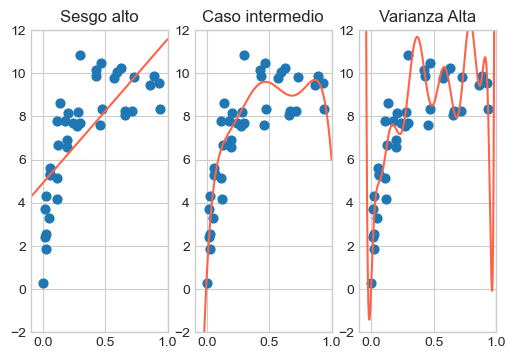

In [118]:
gfx.bias_variance()

En la figura de la izquierda encontramos la situación donde se presenta un sesgo alto. Por Sesgo entendemos la tendencia de un estimador de elegir un modelo incorrecto dado que utiliza supuestos incorrectos sobre el proceso generativo de los datos. Un ejemplo es si utilizamos un modelo lineal en una función cúbica. El modelo sub representará los valores verdaderos en la muestra, independiente del tamaño de ésta.

En la figura de la derecha encontramos un estimador muy flexible, caracterizado por una varianza alta. Por Varianza se entiende la sensibilidad del estimador a fluctuaciones en el training set. Altos niveles de varianza en la muestra pueden generar mucho ruido en el estimador, generando predicciones fuera del rango empírico de los datos. En este caso el modelo sobre representará los valores verdaderos de la muestra.

El objetivo del aprendizaje supervisado es especificar los parámetros de forma tal de encontrar un modelo que sea lo suficientemente flexible con el caso estudiado, pero que también pueda ser extrapolado a nuevos datos y tener un buen desempeño.

#### **6 - Métricas de ajuste de modelo**

Para juzgar cuándo un modelo de machine learning permite generalizar predicciones, nos valemos de métricas y pruebas para su validación.

Si desde la econometría nos valemos de medidas de variabilidad explicada como el R2 ,
desde machine learning nos guiamos por el principio rector de la minimización de pérdidas.

La mayoría de las métricas de un modelo de regresión buscan estimar el error promedio. Una de las más utilizadas es la mean-square error (MSE), que se define de forma:

<center><img src="https://i.postimg.cc/MTPp8pLY/dl36.png"></center>

De forma alternativa también está el root-mean-square error (RMSE), que es la raíz de nuestra métrica MSE. Las diferencias entre ambas son arbitrarias, puesto que RMSE reescala MSE.

#### **7 - Train-Test Split**

Un problema de estimar un modelo con la muestra completa es que el cálculo del MSE depende de la cantidad de atributos ingresados en el modelo. De esta manera, el error tenderá a bajar o en el peor de los casos a mantenerse invariante.

Si desde la **econometría** el problema era estimar la relación entre Y e X mediante la función lineal `Y = f (x) + ε`, para **machine learning** el problema es estimar la función `f(·)` con un estimado de nuestra función.

Otro tema con la validación del modelo y su capacidad de generalizar predicciones, es la necesidad de ver cómo se comportan las estimaciones con nuevos datos. Esta es una característica crucial de los modelos de machine learning más complejos: **realizar predicciones en tiempo real de nuevos datos ingresados**.

La limitación de esto es que rara vez tenemos acceso a más datos sobre nuestro fenómeno. Las buenas prácticas indican que para tener una aproximación sobre la generalización, podemos dividir la muestra en dos submuestras:

Para estimar nuestra función candidata `f`, debemos seguir lo siguiente:

 
1.	Recolectamos una serie de datos que tengan `p ≥ 1` atributos (o variables independientes) y un vector objetivo `y`. Esta serie de datos conocida la
denominamos `Training Set` y provee un campo empírico para implementar nuestros modelos. En la figura, este campo se representa en los cuadrantes `X e y`.

2.	Con los datos a mano, elegimos un método (o múltiples métodos) para generar una estimación `f`.

3.	Utilizamos nuestro training set para entrenar o ajustar nuestra función predictiva `f`. Por entrenar se entiende que el algoritmo/método capture `información existente` sobre el fenómeno.

4.	Con nuestra función entrenada con los datos, buscamos generar predicciones `y = f (x)` en un conjunto de datos que no fueron considerados en el conjunto de entrenamiento. En este último conjunto de datos se conoce como **Conjunto de Pruebas**. Es necesario que éste contenga los mismos atributos que el conjunto de entrenamiento y que los datos en este último conjunto no se encuentren presentes también en el conjunto de entrenamiento. La lógica en lo que respecta a tener dos conjuntos distintos, uno para entrenar al modelo y otro para evaluar su desempeño es la misma que lo ocurrido al evaluar a un alumno en un curso, por un lado le entregaríamos un conjunto de ejemplos resueltos para que aprenda los patrones importantes del problema (aprendizaje supervisado sobre el conjunto de entrenamiento), luego, al momento de evaluarlo en un certamen idealmente confeccionaríamos este último de forma que no tenga exactamente los mismos ejemplos que ya le mostramos al alumno durante la enseñanza, de esta forma podemos medir su capacidad de generalizar los conceptos y patrones que debió haber aprendido de los ejercicios con los que estudió. El alumno/modelo estudia/aprende del conjunto de entrenamiento y **es evaluado su poder de generalización sobre el conjunto de pruebas**, son las métricas obtenidas en este último conjunto las que deben tomarse en cuenta para validar si el alumno pasa de curso o el modelo es efectivo en su tarea. Las métricas del conjunto de entrenamiento aunque nos pueden dar luces del ajuste del modelo sobre los datos de entrenamiento y nos permiten evaluar **subajuste** (un modelo perfectamente podría no lograr encontrar ningún patrón significativo o ser incapaz de ajustarse a ciertos datos aunque sea entrenado sobre estos) no nos dicen, por ejemplo, si el alumno/modelo simplemente aprendió los ejemplos de entrenamiento de memoria (**sobreajuste**).


#### **8 - Digresión: No free lunch theorem**

Del punto 2 se desprende una máxima a considerar: no existe un método o algoritmo que provea de una solución óptima fuera de la empíricamente probada. Por ello es que siempre debemos establecer múltiples modelos para obtener un criterio informado. Éstos métodos no implican nuevos algoritmos de forma obligatoria, pero probar con distintas especificaciones de los parámetros e hiper parámetros.

Se puede encontrar más información y detalles formales de este teorema.

Con nuestros train y test definidos, podemos medir la capacidad de reducir el error mediante MSE. Así calcularemos un `MSEtrain` y un `MSEtest` .

<center><img src="https://i.postimg.cc/7Zw16B6Q/dl37.png"></center>

Donde `nTr` es la cantidad de observaciones en el subconjunto `train`. `MSEtrain` siempre tenderá a bajar (o a estancarse en un valor) en la medida que la complejidad aumenta. Esto implica que no será tan útil para comparar modelos.

<center><img src="https://i.postimg.cc/rwj1tSRy/dl38.png"></center>

En este caso `nTe` es el número de observaciones en el subconjunto `test`. `MSEtest` servirá para medir ¿Qué tan bien predice nuestro modelo en datos previamente desconocidos?.

#### **9 - Algunos comportamientos de la complejidad y el tamaño de los modelos**

En la figura generada con `gfx.validate_curve()` se presenta la visualización entre un puntaje (llámese bondad de ajuste, verosimilitud, etc..) y la complejidad del modelo.

Mediante este gráfico buscamos evaluar cómo se comporta nuestra métrica de evaluación respecto a la complejidad del modelo. Por complejidad del modelo se entiende de la cantidad de parámetros que se agregan al modelo para estimar.

Encontramos tres escenarios:

1.	Un escenario caracterizado por una baja complejidad del modelo, que resulta en sesgos altos. Esto implica que el modelo falla en capturar de forma clara los parámetros verdaderos y la caracterización es insuficiente dado la baja cantidad de parámetros.

2.	Otro escenario por una excesiva complejidad del modelo, lo que resulta en alta varianza del modelo. Bajo esta situación, el modelo genera una muy buena representación de los datos de la muestra entrenada, pero falla en replicar la generalización de las predicciones en la muestra de testing.

3.	Otro escenario donde encontramos la mejor estimación del puntaje para la muestra de pruebas. Bajo este escenario la complejidad del modelo es óptima. Este es el objetivo del aprendizaje supervisado.

Cabe destacar que mientras que en la muestra de entrenamiento el puntaje siempre incrementará en la medida que agreguemos más atributos, esto será ineficiente en la medida que generaremos una función no parsimoniosa que no podremos aplicar a otro conjunto de datos.


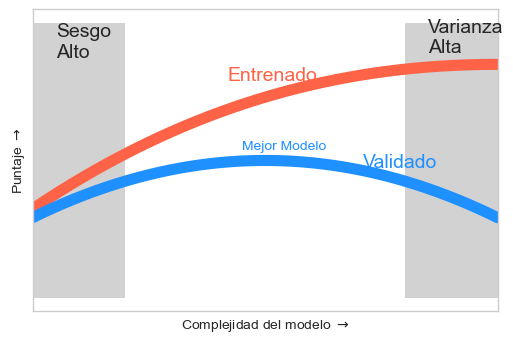

In [119]:
gfx.validate_curve()

Ya entendiendo que la cantidad de atributos agregados puede dañar la capacidad de generalizar un modelo en nuevos datos, es meritorio mencionar el efecto del tamaño muestral en el aprendizaje del modelo.

Por aprendizaje del modelo hacemos referencia a la capacidad de obtener información sobre los parámetros verdaderos a estimar.

La figura generada con `gfx.learning_curve()` muestra la relación entre el tamaño de las muestras de entrenamiento y prueba, y el puntaje a optimizar. Se aprecia que en situaciones donde el tamaño muestral del modelo entrenado es bajo, los puntajes serán sobrestimados en relación a los puntajes de la muestra validada.

Esperamos que ambos modelos tiendan a converger en la medida que el tamaño muestral aumenta.

Esto está asociado a lo que vimos en sesiones pasadas con los aspectos asintóticos de las variables aleatorias, donde una mayor cantidad de observaciones de una muestra permite asimilar de mejor manera las características poblacionales.

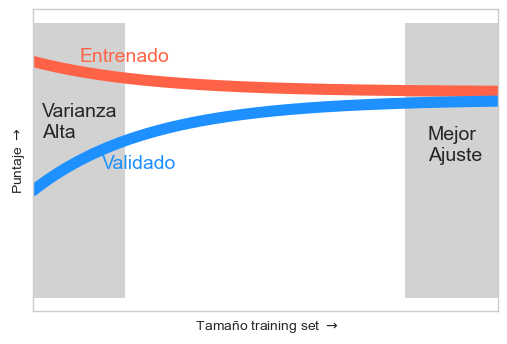

In [120]:
gfx.learning_curve()

Existen métodos más sofisticados para generar subconjuntos como la validación cruzada (crossvalidation) y la estimación 'deja-uno-fuera' (Leave-one-out) que veremos la próxima semana.

#### **10 - Refactorización de nuestro modelo**

##### `Feature engineering`

Resulta que el modelo que generamos con sklearn incluye todas las variables dentro de la matriz de datos. Un inconveniente relacionado es el hecho que nuestro modelo puede que no sea el óptimo, dado que incluimos regresores que no aportan poder predictivo y utilizan grados de libertad de forma ineficiente. Nuestro objetivo es encontrar un número adecuado de regresores a incluir en nuestro modelo predictivo.

Una manera simple de determinar cuáles van a ser los principales atributos a incluir en el modelo es mediante la generación de correlaciones parciales entre cada atributo y el vector objetivo.

Este procedimiento es un ejemplo de feature engineering, el seleccionar y/o preprocesar atributos correspondiente a los datos que permiten resumir de manera precisa un modelo. Está asociado al concepto de parsimonia proveniente de la academia, donde la explicación más adecuada es aquella que no agregue información irrelevante (el principio de la navaja de Occam).

El código de abajo es una versión extremadamente simplificada de una búsqueda de correlaciones. Para tener un algoritmo más depurado, es necesario diferenciar entre la naturaleza de las variables ingresadas y el tipo de correlación que se genera. Para ello se pueden ocupar correlaciones poliseriales para la asociación categórica-contínua y punto biserial para ordinales-continuas.


In [176]:
# extraemos los nombres de las columnas en la base de datos 
columns = df.columns

# generamos 3 arrays vacíos para guardar los valores 
# nombre de la variable
attr_name = []
# correlación de pearson 
pearson_r = []
# valor absoluto de la correlación 
abs_pearson_r = []

# para cada columna en el array de columnas
for col in columns:
    # si la columna no es la dependiente
    if col != "earn":
    # adjuntar el nombre de la variable en attr_name 
        attr_name.append(col)
    # adjuntar la correlación de pearson 
        pearson_r.append(df[col].corr(df['earn']))
    # adjuntar el absoluto de la correlación de pearson 
        abs_pearson_r.append(abs(df[col].corr(df['earn'])))

# transformamos los arrays en un DataFrame 
features = pd.DataFrame({
    'attribute': attr_name, 
    'corr':pearson_r, 
    'abs_corr':abs_pearson_r
})

# generamos el index con los nombres de las variables 
features = features.set_index('attribute')

# ordenamos los valores de forma descendiente 
features.sort_values(by=['abs_corr'], ascending=False)

,corr,abs_corr
attribute,,
sex,-0.352354,0.352354
male,0.352354,0.352354
ed,0.349334,0.349334
height,0.302707,0.302707
height1,0.188762,0.188762
height2,0.105633,0.105633
age_category,0.075321,0.075321
yearbn,-0.068475,0.068475
age,0.068475,0.068475


#### **11 - Implementando un modelo con menos regresores**

En base a la información obtenida con nuestra tabla de correlaciones parciales, podemos refinar nuestro primer modelo para reducir el error cuadrático.

Para ello seleccionaremos aquellas correlaciones que sean superior al 0.30. Resulta que nuestra versión más parsimoniosa incluye sólo a Male, Ed y Height.

In [138]:
# separemos los vectores a trabajar 
y_vec= df.loc[:, 'earn']
X_mat = df.loc[:, ['male', 'ed', 'height']]

In [177]:
y_vec

0       50000.0
1       60000.0
2       30000.0
3       51000.0
4        9000.0
         ...   
1369    19000.0
1370    15000.0
1371     8000.0
1372    60000.0
1373     6000.0
Name: earn, Length: 1374, dtype: float64

In [178]:
X_mat

,male,ed,height
0,1,16,74
1,0,16,66
2,0,16,64
3,0,17,63
4,0,15,64
...,...,...,...
1369,1,12,72
1370,0,18,61
1371,0,12,64
1372,1,12,72


Ahora procedemos a dividir la muestra en conjuntos de entrenamiento y prueba. A diferencia del ejemplo anterior, donde nuestra división se realizó mediante la separación de las últimas 30 observaciones, en este caso utilizaremos `train_test_split`, un método que permite realizar separaciones de muestras aleatorizadas. Cabe destacar que este método es el preferido, dado que mediante la aleatorización podemos cancelar el efecto de sesgo por variables intervinientes en la muestra.

El método toma como argumentos la matriz de atributos (`X_mat`) y el vector objetivo a dividir (`y_vec`), el porcentaje de datos que serán asignados al conjunto de muestra (`test_size`), y una semilla pseudoaleatoria para asegurar replicación de resultados (`random_state`).

`train_test_split` devuelve como objetos la matriz de atributos para entrenar (`X_train`), la matriz de atributos para validar (`X_test`), el vector objetivo para entrenar (`y_train`) y el vector objetivo para contrastar las predicciones (`y_test`). Cabe destacar que el método las devuelve en ese orden, así que es mejor seguirlo para evitar confusiones entre objetos.

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.30, random_state=11238)

Con la muestra ya dividida, podemos implementar el modelo de regresión con los mismos hiper parámetros anteriores.

In [180]:
purge_model = linear_model.LinearRegression(fit_intercept=True) 
purge_model.fit(X_train, y_train)
purge_model_yhat = purge_model.predict(X_test)

Ahora podemos comparar el poder predictivo entre los dos modelos mediante el promedio del error cuadrático y el R cuadrado. Por motivos prácticos, se sugiere presentar toda esta información de manera visual.

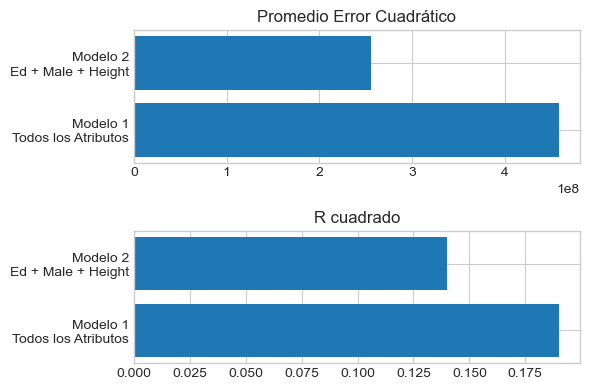

In [181]:
m2_mse = mean_squared_error(y_test, purge_model_yhat).round(0) 
m2_r2 = r2_score(y_test, purge_model_yhat).round(2) 
plt.subplot(2,1,1)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nEd + Male + Height'], [m1_mse, m2_mse])
plt.title("Promedio Error Cuadrático") 
plt.subplot(2,1, 2)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nEd + Male + Height'], [m1_r2, m2_r2])
plt.title("R cuadrado")
plt.tight_layout()

Si comparamos el promedio del error cuadrático para ambos modelos, existe evidencia para preferir el segundo modelo, dado que presenta una reducción significativa del error cuadrático.

Resulta contraintuitivo el hecho que el R cuadrado indica evidencia favorable para el primer modelo. ¿Por qué sucede esto?

Resulta que la forma en que se calcula el R cuadrado no penaliza por la inclusión de variables. En la medida que nosotros agregamos más variables al modelo, el R cuadrado sólo puede aumentar en su "poder explicativo" o mantenerse constante. Este comportamiento engaña el criterio de selección de modelos.

El promedio del error cuadrático hace más sentido para justificar el poder predictivo de un modelo de regresión lineal en el sentido que es una medida directa del método de optimización (mínimos cuadrados ordinarios).